<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/extra/More_Morphological_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our original morphological features dataframe is fairly limited and mostly focuses on absolute measures (for example: total length or number of branches), which could be vulnerable to some of the issues we discussed on Thursday such as neurite truncation. When we look at the features being used in Allen papers, we see a broader set with many relative features (see: p75-76 of [supplemental](https://static-content.springer.com/esm/art%3A10.1038%2Fs41593-019-0417-0/MediaObjects/41593_2019_417_MOESM1_ESM.pdf)).

I've added a `morph_features_expanded.csv` file in our 2025 data folder (see below) has a larger subset of features extracted using the feature extractor. `morph_features_positional.csv` has features that depend on position; each has an $x$, $y$ and $z$ value. From the above link:

> Note that here “y” is in the pia-to-white-matter direction, “x” is across the face of the slice, and “z” is into the slice. Units are indicated with parentheses; other features are unitless.

You can see definitions for (some/all?) of these features [here](https://html-preview.github.io/?url=https://github.com/AllenInstitute/neuron_morphology/blob/dev/feature_description.html).

This feature set is very broad- some are meaningful, but others might not be.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
morph_original = pd.read_csv(
    "/content/drive/Shareddrives/Lisman Laboratory/Lisman 2024/Neuro/Data/processed data/morph_data.csv",
    index_col="cell_specimen_id"
)

morph_additional = pd.read_csv(
    "/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/morph_features_expanded.csv",
    index_col="cell_specimen_id"
)

morph_positional = pd.read_csv(
    "/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/morph_features_positional.csv",
    index_col="cell_specimen_id"
)

cell_metadata = pd.read_csv("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/20200711_patchseq_metadata_mouse.csv", index_col="cell_specimen_id")

Available features (ignorning `dendrite`, `axon`, etc prefixes):

In [5]:
morph_additional.columns.sort_values().to_list()

['all_neurites.bifurcation.dimension.depth',
 'all_neurites.bifurcation.dimension.height',
 'all_neurites.bifurcation.dimension.width',
 'all_neurites.compartment.dimension.depth',
 'all_neurites.compartment.dimension.height',
 'all_neurites.compartment.dimension.width',
 'all_neurites.max_branch_order',
 'all_neurites.max_euclidean_distance',
 'all_neurites.mean_bifurcation_angle_local',
 'all_neurites.mean_bifurcation_angle_remote',
 'all_neurites.mean_diameter',
 'all_neurites.mean_fragmentation',
 'all_neurites.mean_parent_daughter_ratio',
 'all_neurites.node.dimension.depth',
 'all_neurites.node.dimension.height',
 'all_neurites.node.dimension.width',
 'all_neurites.num_branches',
 'all_neurites.num_nodes',
 'all_neurites.num_outer_bifurcations',
 'all_neurites.num_tips',
 'all_neurites.tip.dimension.depth',
 'all_neurites.tip.dimension.height',
 'all_neurites.tip.dimension.width',
 'all_neurites.total_length',
 'all_neurites.total_surface_area',
 'all_neurites.total_volume',
 'ap

## Some examples

<Axes: xlabel='dendrite.mean_diameter', ylabel='Count'>

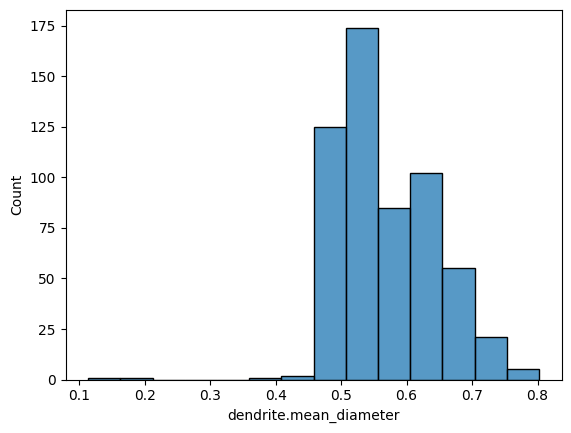

In [8]:
sns.histplot(morph_additional['dendrite.mean_diameter'], binwidth=0.05)

<Axes: xlabel='dendrite.max_branch_order', ylabel='Count'>

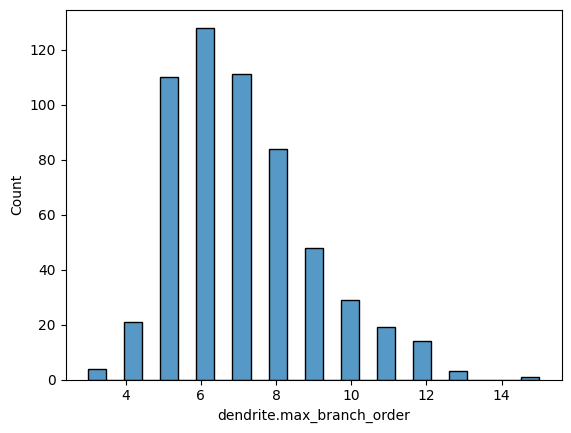

In [15]:
sns.histplot(morph_additional['dendrite.max_branch_order'])

<Axes: xlabel='axon.max_branch_order', ylabel='Count'>

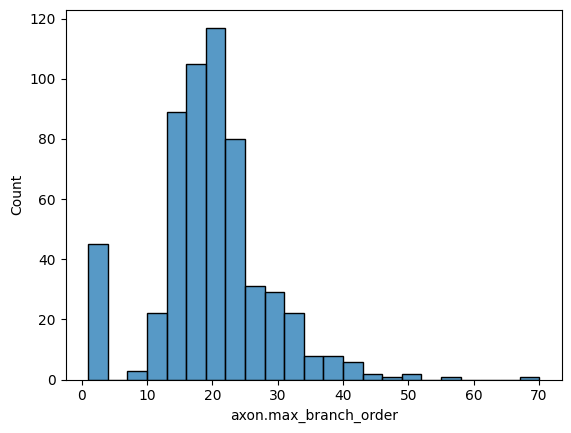

In [19]:
sns.histplot(morph_additional['axon.max_branch_order'], binwidth=3)

<Axes: ylabel='Count'>

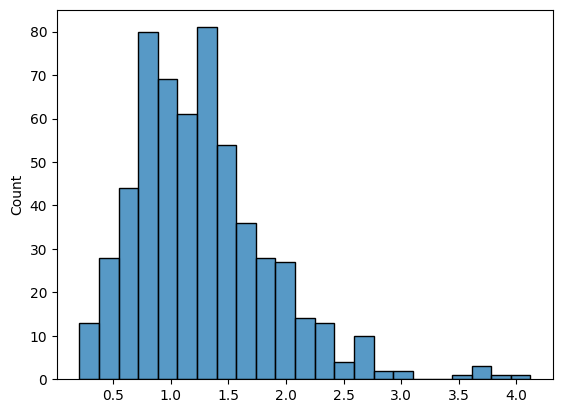

In [39]:
neuron_height_to_width = morph_additional['all_neurites.compartment.dimension.height'] / morph_additional['all_neurites.compartment.dimension.width']
sns.histplot(neuron_height_to_width)